<a href="https://colab.research.google.com/github/Poojitha319/Diabetes_Readmission_stimulation/blob/main/Diabetes_Simulation_Project_(Diabetes_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statistics import mode

# Loading the Dataset and Reading it

In [ ]:
#loading Dataset
data = pd.read_csv("/content/diabetic_data.csv")

In [ ]:
#displaying first 10 rows of data
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27793 entries, 0 to 27792
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              27793 non-null  int64  
 1   patient_nbr               27793 non-null  int64  
 2   race                      27793 non-null  object 
 3   gender                    27793 non-null  object 
 4   age                       27793 non-null  object 
 5   weight                    27793 non-null  object 
 6   admission_type_id         27793 non-null  int64  
 7   discharge_disposition_id  27793 non-null  int64  
 8   admission_source_id       27793 non-null  int64  
 9   time_in_hospital          27793 non-null  int64  
 10  payer_code                27793 non-null  object 
 11  medical_specialty         27793 non-null  object 
 12  num_lab_procedures        27793 non-null  int64  
 13  num_procedures            27793 non-null  int64  
 14  num_me

In [ ]:
data.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,2.779300e+04,2.779300e+04,27793,27793,27793,27793,27793.000000,27793.000000,27793.000000,27793.000000,...,27792,27792,27792,27792,27792,27792,27792,27792,27792,27792
unique,NaN,NaN,6,2,10,10,NaN,NaN,NaN,NaN,...,1,4,4,1,1,1,1,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,20340,14823,7331,26870,NaN,NaN,NaN,NaN,...,27792,15285,27765,27792,27792,27792,27792,17272,20376,15340
mean,5.250293e+07,2.566143e+07,NaN,NaN,NaN,NaN,2.320836,5.337603,6.820350,4.709711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.417376e+07,3.197322e+07,NaN,NaN,NaN,NaN,1.732156,6.956722,5.057342,3.142485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.365125e+07,3.016755e+06,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.467619e+07,1.277532e+07,NaN,NaN,NaN,NaN,2.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.310811e+07,2.580014e+07,NaN,NaN,NaN,NaN,3.000000,6.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
# Dealing with null values
#in dataset the missing values are represented in "?" sign so lets remove it

for i in data.columns:
    if data[i].dtype==object:
         print(i,data[i][data[i] == '?'].count())


race 495
gender 0
age 0
weight 26870
payer_code 26144
medical_specialty 10951
diag_1 8
diag_2 159
diag_3 707
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
data['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [ ]:
data.loc[(data['age'].notnull())&(data['weight']!='?'),['age','weight']].groupby(["age",'weight'])['weight'].count()

age       weight   
[0-10)    [0-25)         2
          [25-50)        1
[10-20)   [25-50)        1
          [50-75)        3
[20-30)   [0-25)         1
          [100-125)      1
          [50-75)       11
          [75-100)       7
[30-40)   >200           1
          [0-25)         1
          [100-125)      2
          [125-150)      3
          [150-175)      1
          [25-50)        1
          [50-75)        9
          [75-100)       9
[40-50)   [0-25)         6
          [100-125)     16
          [125-150)      9
          [150-175)      1
          [25-50)        2
          [50-75)       13
          [75-100)      23
[50-60)   [0-25)         4
          [100-125)     29
          [125-150)      7
          [150-175)      1
          [175-200)      1
          [25-50)        7
          [50-75)       33
          [75-100)      64
[60-70)   [0-25)        10
          [100-125)     42
          [125-150)      6
          [150-175)      2
          [25-50)        5
        

In [ ]:
#Dropping these columns,
data = data.drop(['weight','payer_code','medical_specialty'],axis=1)

In [ ]:
data = data.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

primary diagnosis, secondary diagnosis, & additional diagnosis are having very less null values so i am dropping only the rows containing nullvalues

In [ ]:
drop_values = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)

drop_values = drop_values.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop_values = drop_values.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop_values = drop_values.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop_values = drop_values.union(set(data['race'][data['race'] == '?'].index))
drop_values = drop_values.union(set(data[data['discharge_disposition_id'] == 11].index))

In [ ]:
new_values = list(set(data.index)-set(drop_values))
data = data.iloc[new_values]

In [ ]:
data.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,2.618500e+04,2.618500e+04,26185,26185,26185,26185.000000,26185.000000,26185.000000,26185.000000,26185.000000,...,26184,26184,26184,26184,26184,26184,26184,26184,26184,26184
unique,NaN,NaN,5,2,10,NaN,NaN,NaN,NaN,NaN,...,3,4,4,1,1,1,1,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,19529,14042,6996,NaN,NaN,NaN,NaN,NaN,...,26157,14591,26159,26184,26184,26184,26184,16241,19172,14087
mean,5.264260e+07,2.534746e+07,NaN,NaN,NaN,2.318006,5.324728,6.831545,4.762307,45.189421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.408052e+07,3.184940e+07,NaN,NaN,NaN,1.731731,7.003834,5.059778,3.148811,18.298033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.397877e+07,2.918079e+06,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.498304e+07,1.202966e+07,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,46.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.318961e+07,2.556519e+07,NaN,NaN,NaN,3.000000,6.000000,7.000000,6.000000,58.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


if you compare 1st describe table and the above table we can find the difference in frequency, count & other values too.

In [ ]:
data.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                   

In [ ]:
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())
         #print(col,data[col][data[col] == 'Nan'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
data['readmitted'].unique()

array(['>30', 'NO', '<30', nan], dtype=object)

In [ ]:
# We can see that there are three types of values:- 'NO','<30','>30'. So, to make it a categorical variable so that different
# ML techniques can be applies.

data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [ ]:
# Removing the patients from the dataset that are dead.

data = data[((data.discharge_disposition_id != 11) &
                                          (data.discharge_disposition_id != 13) &
                                          (data.discharge_disposition_id != 14) &
                                          (data.discharge_disposition_id != 19) &
                                          (data.discharge_disposition_id != 20) &
                                          (data.discharge_disposition_id != 21))]

In [ ]:
data['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5,  7, 25, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9])

# Feature Engineering

In [ ]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [ ]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for i in drugs:
    colname = str(i)+ 'temp'
    data[colname] = data[i]. apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
data['Medication'] = 0
for i in drugs:
    colname = str(i)+ 'temp'
    data['Medication'] = data['Medication'] + data[colname]
    del data[colname]

data['Medication'].value_counts()

0     20773
1      4979
2       301
3        29
21        1
Name: Medication, dtype: int64

In [ ]:
columns = data.columns.tolist()
for i in columns:
    print(i)
    print(data[i].unique())
    print('\n')

In [ ]:
data['max_glu_serum'] = data['max_glu_serum'].replace('>200','low')
data['max_glu_serum'] = data['max_glu_serum'].replace('>300','high')

In [ ]:
data['max_glu_serum'].unique()

array(['None', 'high', 'Norm', 'low', nan], dtype=object)

In [ ]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 'low')
data['A1Cresult'] = data['A1Cresult'].replace('>8', 'high')

In [ ]:
data['A1Cresult'].unique()

array(['None', 'low', 'high', 'Norm', nan], dtype=object)

In [ ]:
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['gender'] = data['gender'].replace('Unknown/Invalid', 'Unknown')

In [ ]:
#Encoding the data,

'''def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]


    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})
            count += 1
    return dictcout


def codemap(data, codes):
    import pandas as pd
    namecol = data.columns.tolist()
    for col in namecol:
        temp = []
        for num in data[col]:
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else:
                lkup = num.split('.')[0]
                temp.append(codes[lkup])
        data.loc[:, col] = temp
    return data


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
data[listcol] = codemap(data[listcol], codes)'''

In [ ]:
'''print(data['diag_1'].unique())
print(data['diag_2'].unique())
print(data['diag_3'].unique())'''

In [ ]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,

numcolumn = data.select_dtypes(include = [np.number]).columns
objcolumn = data.select_dtypes(include = ['object']).columns
data[numcolumn] = data[numcolumn].fillna(0)
data[objcolumn] = data[objcolumn].fillna("unknown")

In [ ]:
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == 'nan'].count())

race 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0


In [ ]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [ ]:
data.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                   

In [ ]:
data.describe()

,encounter_id,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,service_utilization,Medication
count,2.608300e+04,2.608300e+04,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,5.259396e+07,2.532745e+07,0.463750,2.316145,5.291646,6.815665,4.757620,45.200437,1.439443,15.427175,0.160488,0.071387,0.617720,6.945175,0.380094,0.732776,0.119733,0.849596,0.218111
std,2.408306e+07,3.185445e+07,0.498694,1.730424,6.997421,5.050309,3.146145,18.283925,1.749134,8.040701,0.726713,0.462582,1.222148,1.901509,0.485419,0.442519,0.324655,1.644795,0.465189
min,1.252200e+04,1.350000e+02,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.392362e+07,2.911532e+06,0.000000,1.000000,1.000000,2.000000,2.000000,33.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.487465e+07,1.195890e+07,0.000000,1.000000,1.000000,7.000000,4.000000,46.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.315424e+07,2.554432e+07,1.000000,3.000000,6.000000,7.000000,6.000000,58.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,9.107977e+07,1.152184e+08,1.000000,8.000000,25.000000,20.000000,14.000000,129.000000,6.000000,63.000000,20.000000,25.000000,16.000000,9.000000,1.000000,1.000000,1.000000,31.000000,21.000000


# Data Analysis

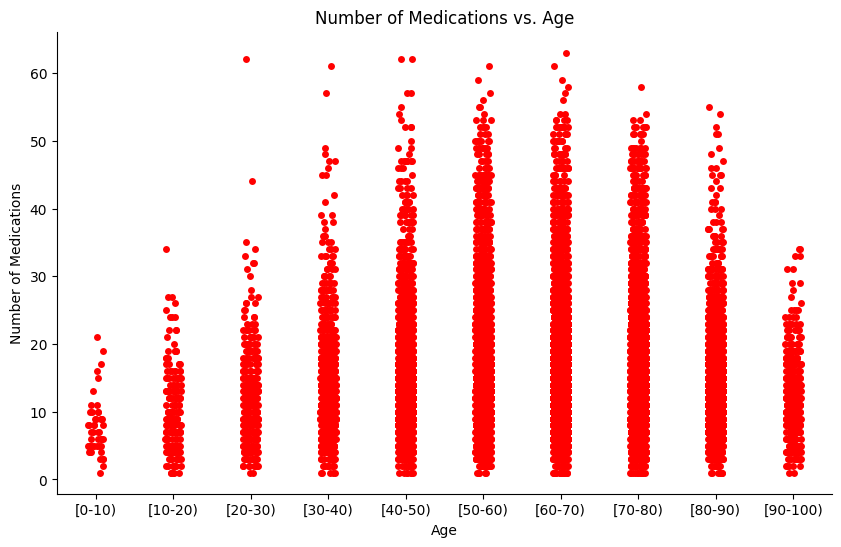

In [ ]:
#Let's try to see how the age and number of medicines vary,
fig = plt.figure(figsize=(10,6))
age_feature = data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = age_feature, color = 'red')
sns.despine() #remove top and right axes
#x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

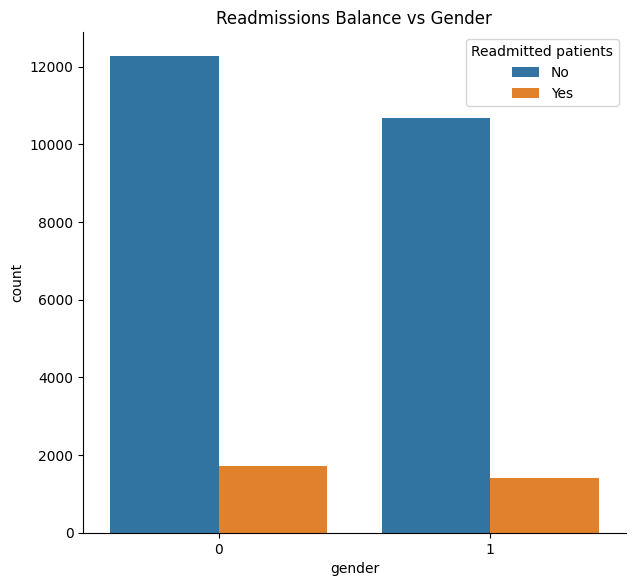

In [ ]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = data)

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance vs Gender')
plt.show()

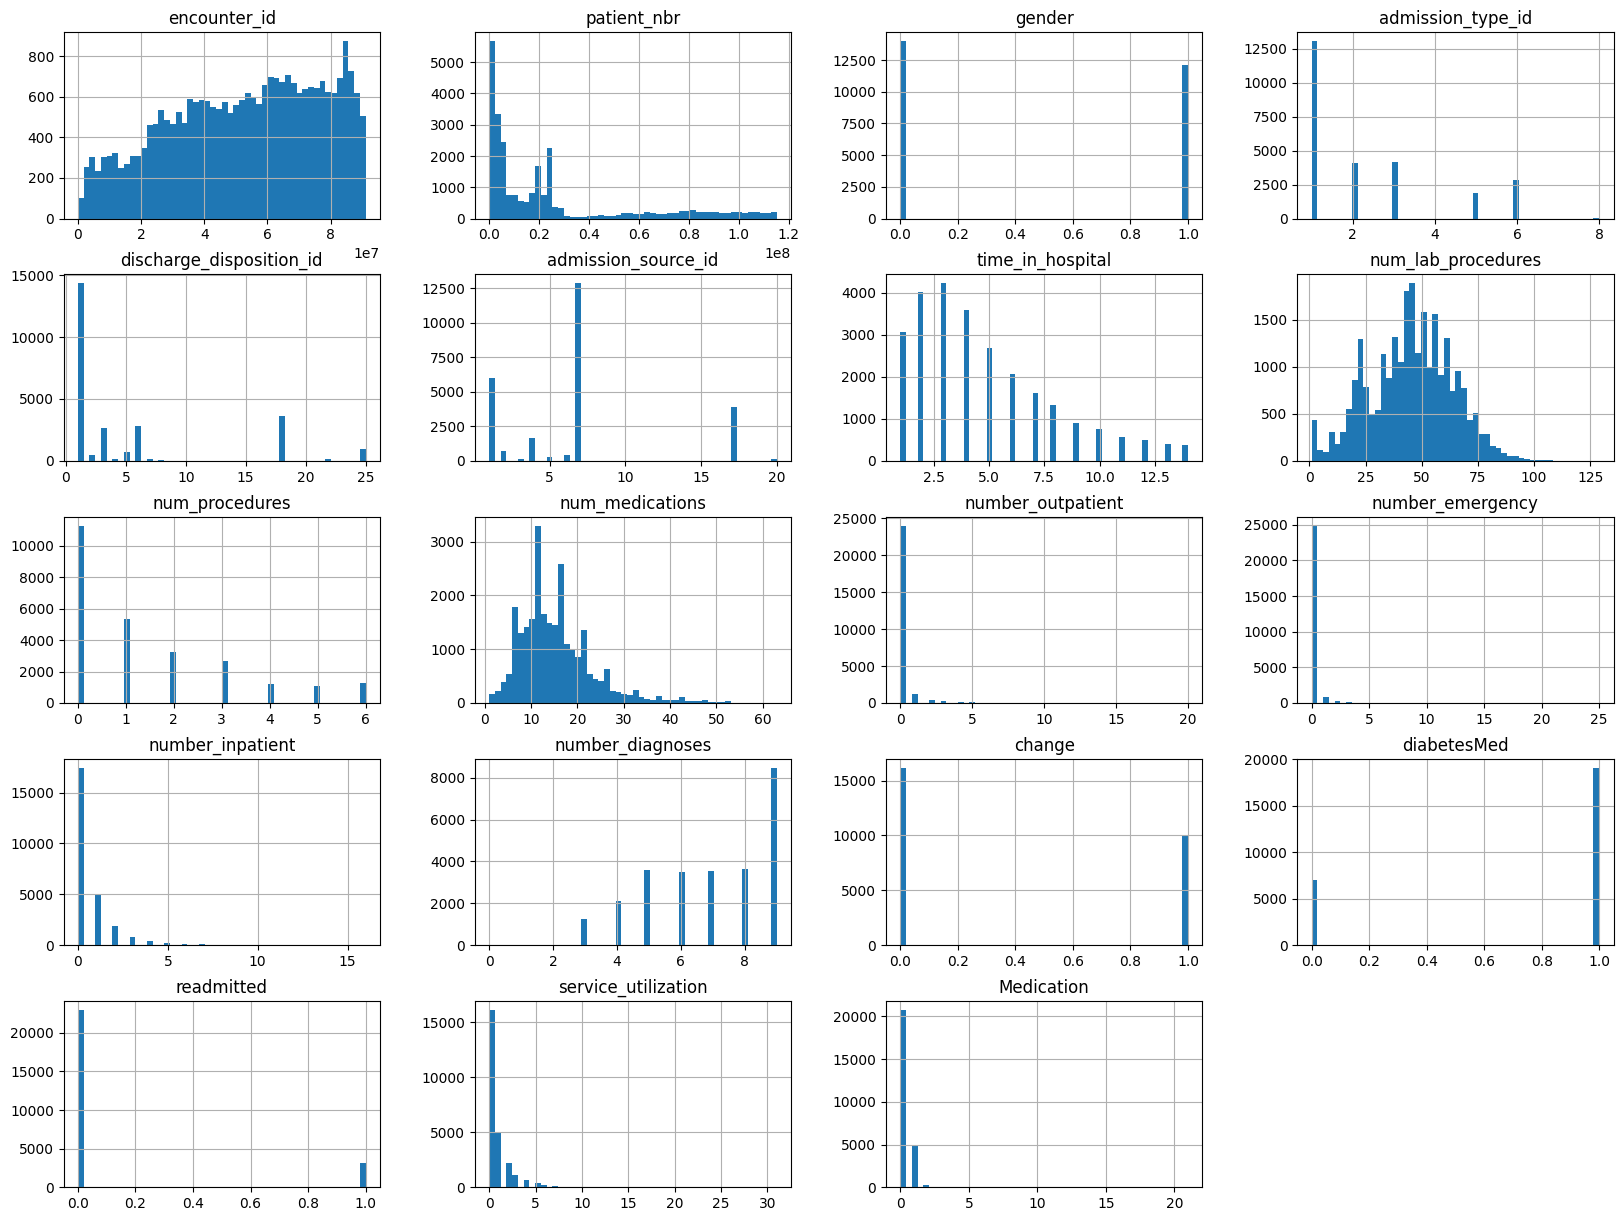

In [ ]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='count'>

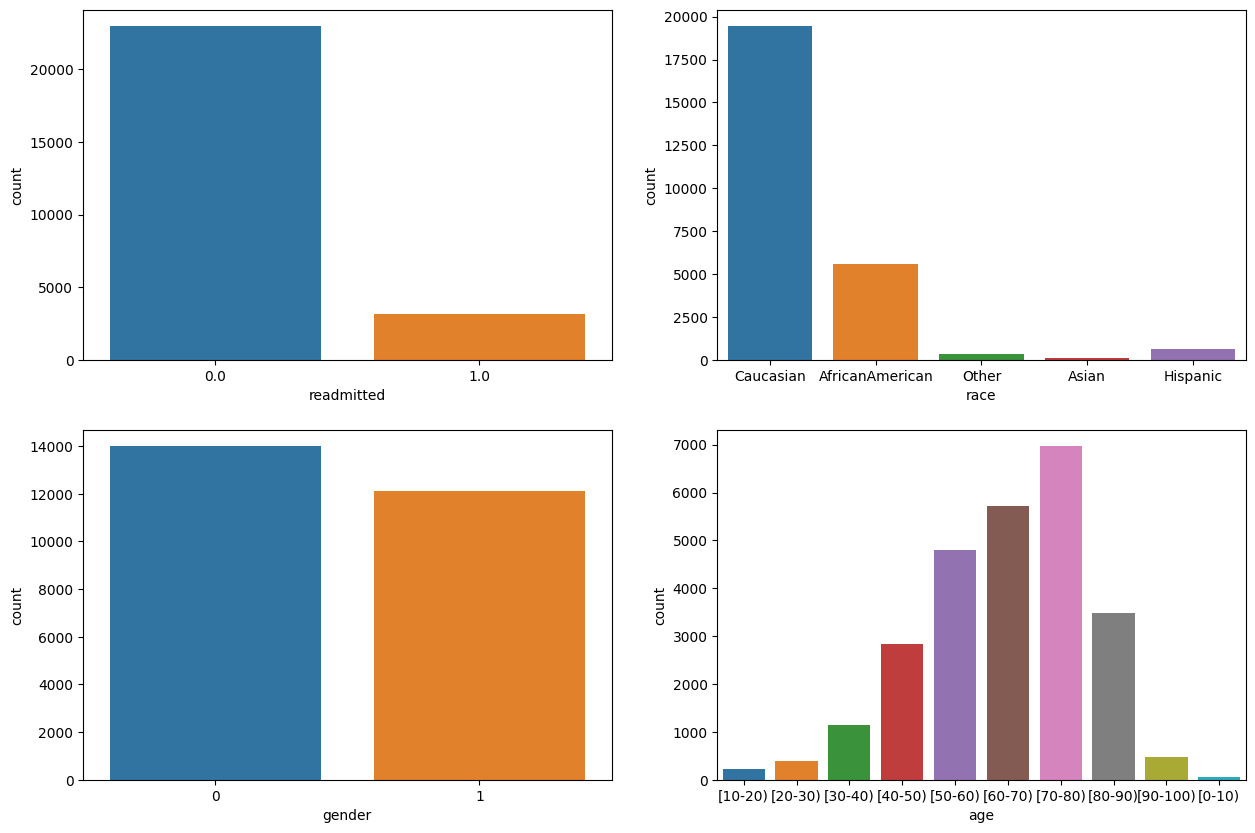

In [ ]:
#Exploring the categorical variables,
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=data, ax=ax[0][0])
sns.countplot(x="race", data=data, ax=ax[0][1])
sns.countplot(x="gender", data=data, ax=ax[1][0])
sns.countplot(x="age", data=data, ax=ax[1][1])


# Feature Analysis

In [ ]:
#Distribution of Readmission
#sns.countplot(data['readmitted']).set_title('Distribution of Readmission')

**Time in Hospital and Readmission**

<ipython-input-50-f79eece56c39>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-50-f79eece56c39>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

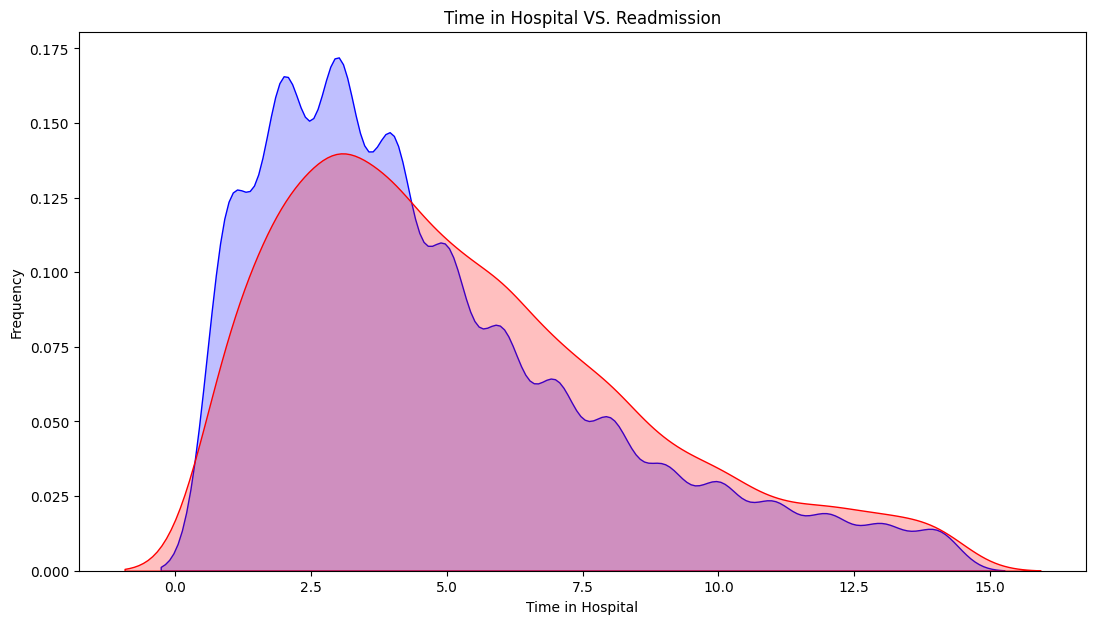

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [ ]:
plt.show()

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

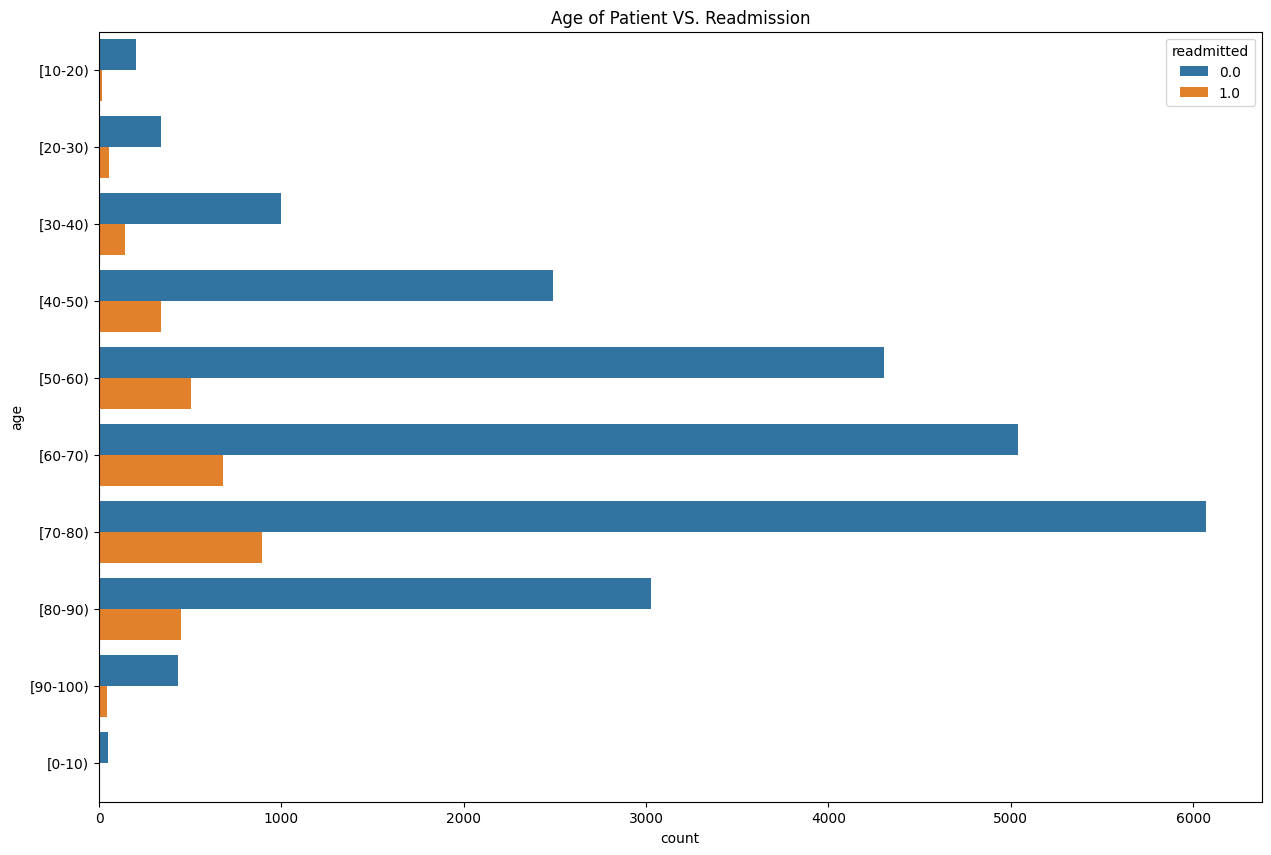

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

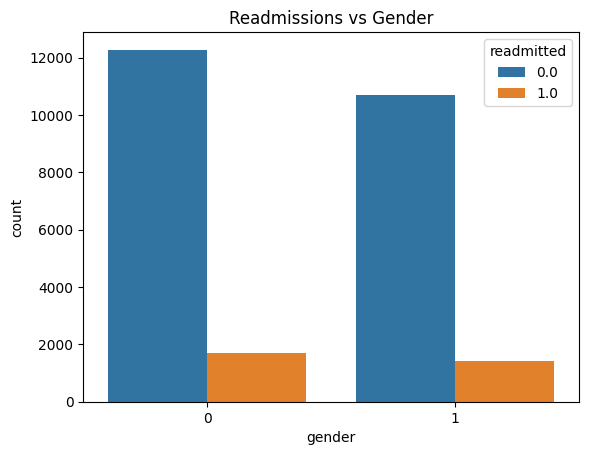

In [ ]:
#Gender and Readmissions Male =1, Female = 0

sns.countplot(x = data['gender'], hue = data['readmitted']).set_title("Readmissions vs Gender")
plt.show()

<Axes: xlabel='count', ylabel='race'>

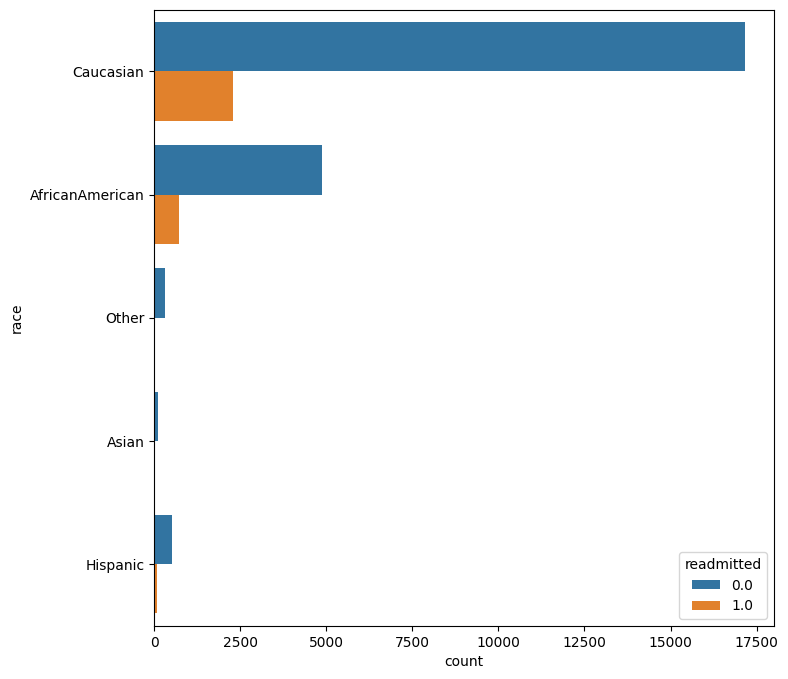

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['race'], hue = data['readmitted'])

**Number of Medication used and readmission**

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

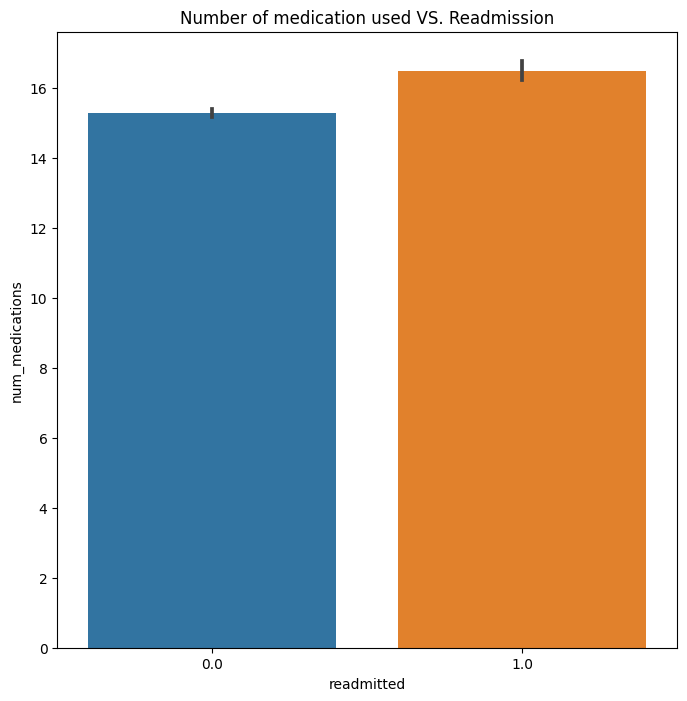

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")

In [ ]:
'''fig = plt.figure(figsize=(8,8))
sns.countplot(data['change'], hue = data['readmitted']).set_title('Change of Medication VS. Readmission')'''

In [ ]:
plt.show()

**Diabetes Medicine vs Readmission**
1. Yes = if the diabetes medicine is prescribed = 1
2. No = if the Medicine is not prescribed = 0

Text(0.5, 1.0, 'Diabetes Medication VS Readmission')

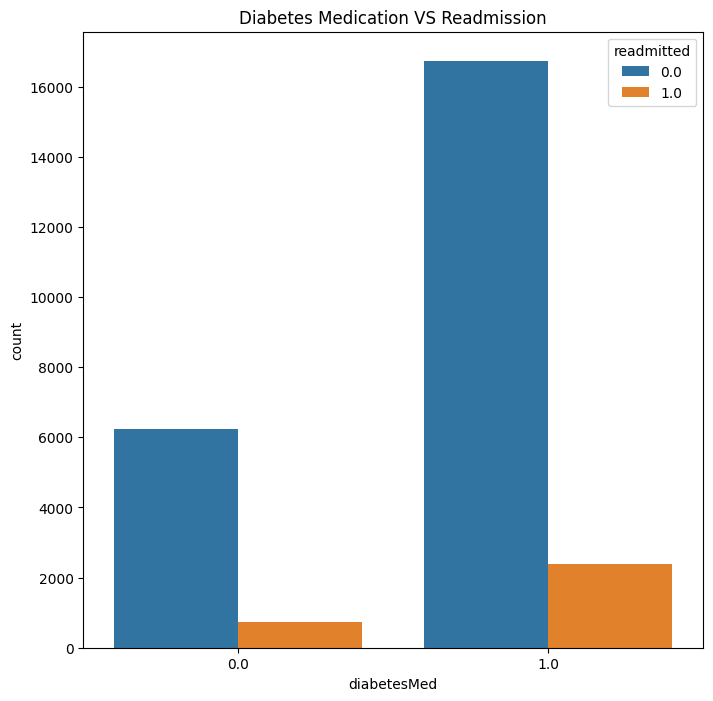

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=data['diabetesMed'], y = data['readmitted'],hue='Type').set_title('Diabetes Medication VS Readmission')

In [ ]:
plt.show()

**Service Utilization and Readmission**

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = data['service_utilization'], x = data['readmitted']).set_title('Service Utilization VS. Readmission')

In [ ]:
plt.show()

** Glucose Serum test result and Readmission**

This test is used for a blood glucose test is used to find out if your blood sugar levels are in healthy range.It is often used to help diagnose and monitor diabetes.

1. '>200' : low = indicates diabetes
2. '>300' : high = Indicates diabetes
3. 'Norm' : Norm = Normal
4. 'None' : None = test was not taken

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose test serum test result VS. Readmission')

In [ ]:
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,6))
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [ ]:
plt.show()

In [ ]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

**Pre-Modelling Data Processing**

In [ ]:
#The labelEncoder works on only categorical features. We need first to extract the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [ ]:
data.head()

In [ ]:
data.head().T

# Variance Threshold Factor

In [ ]:
X = data.loc[:,data.columns !='readmitted']
Y = data.loc[:,data.columns == 'readmitted']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["Features"] = X.columns
vif.sort_values('VIF Factor').reset_index(drop = True)

**Correlation matrix**

In [ ]:
k = 40 #number of variables for heatmap
plt.figure(figsize=(30,15))
corrmat = data.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'readmitted')['readmitted'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# get list of only numeric features
num_col = list(set(list(data._get_numeric_data().columns)))
num_col


In [ ]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'diag_1', 'diag_2', 'diag_3']

In [ ]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = data[i].skew()
    skew_before.append(skewval)

    kurtval = data[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = data[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(data[data[i] == 0])/len(data) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(data[data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [ ]:
statdataframe

In [ ]:
#performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            data = data[data[colname] > 0]
            data[colname + "_log"] = np.log(data[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            data = data[data[colname] >= 0]
            data[colname + "_log1p"] = np.log1p(data[colname])

In [ ]:
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: data[x].std())
datf['mean'] = datf['features'].apply(lambda x: data[x].mean())

In [ ]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

# Modelling

In [ ]:
data.columns

# Logistic Regression

In [ ]:
feature_set = ['gender', 'age', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin','number_inpatient_log1p','number_outpatient_log1p']

In [ ]:
X = data[feature_set]
Y = data['readmitted']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=None)
LR = LogisticRegression(penalty='l2',fit_intercept=True,intercept_scaling=1,C=2,solver = 'newton-cg' )
LR.fit(X_train, Y_train)
#logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)


LogisticRegression(C=2, solver='newton-cg')

In [ ]:
LR_predict = LR.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(LR_predict, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, LR_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_test, LR_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_test, LR_predict)))

In [ ]:
accuracy_LR = accuracy_score(Y_test, LR_predict)
precision_LR = precision_score(Y_test, LR_predict)
recall_LR = recall_score(Y_test, LR_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, LR_predict))

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, LR_predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(LR.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR_predict, target_names = ['NO', 'YES']))

In [ ]:
# Checking the performance of model using ROC curve plots
YScre = LR.decision_function(X_test)

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(LR.predict(X_train),Y_train,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('FPR - Specificity')
plt.ylabel('TPR - Sensitivity')
plt.title('ROC curve')
plt.show()

# Decision Tree

In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum_0',
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1',
                 'diag_1', 'diag_2', 'diag_3']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, Y_train)

In [ ]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, dtree_pred)))

In [ ]:
accuracy_DT = accuracy_score(Y_test, dtree_pred)
precision_DT = precision_score(Y_test, dtree_pred)
recall_DT = recall_score(Y_test, dtree_pred)

As we know according to the important variable the decision tree we be built. so now, we are going to take the important variables through the decision tree that has been built.

In [ ]:
# listing down the top most important features
features = X_train.columns
import_features = dtree.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(10,"Importance")
top_features.sort_values(by = "Importance", inplace = True)

In [ ]:
print(top_features)

In [ ]:
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)

In [ ]:
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('Importance')
plt.title('Top Features from Decision Tree')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42, n_estimators = 500)
random_forest.fit(X_train,Y_train)
RandomForest = random_forest.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, Y_train)

In [ ]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(Y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(Y_test, rm_prd)))

In [ ]:
accuracy_RF = accuracy_score(Y_test, rm_prd)
precision_RF = precision_score(Y_test, rm_prd)
recall_RF = recall_score(Y_test, rm_prd)

In [ ]:
#Printing the confusion matrix,
print(confusion_matrix(Y_test, RandomForest))

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, RandomForest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(Y_test, RandomForest, target_names = ['NO', 'YES']))

In [ ]:
#Determining which features are most important,
# listing down the top most important features
features = X_train.columns
import_features = dtree.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(10,"Importance")
top_features.sort_values(by = "Importance", inplace = True)
plt.figure(figsize=(10,6))
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('Importance')
plt.title('Top Features from Random Forest')
plt.show()

# AdaBoosted Classification Model

In [ ]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 200)
adaclass.fit(X_train, Y_train)
yadaclas = adaclass.predict(X_test)

In [ ]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(X_test, Y_test))

In [ ]:
#Checking the confusion matrix,
print(confusion_matrix(Y_test, yadaclas))

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
#Checking recall, f1 :-
print(classification_report(Y_test, yadaclas, target_names = ['NO', 'YES']))

In [ ]:
# calculate the False Positive and True Positive rate to get the ROC curve
yadaclas = adaclass.decision_function(X_test)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Y_test, yadaclas)

# Comparing The Models

In [ ]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_LR, accuracy_DT, accuracy_RF]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_LR, precision_DT, precision_RF]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_LR, recall_DT, recall_RF, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')

# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()
